# Análisis exploratorio  

In [17]:
from ucimlrepo import fetch_ucirepo 
import funciones as fn
datos = fetch_ucirepo(id=544)

In [18]:
import pandas as pd
X=datos["data"]["features"]
Y=datos["data"]["targets"]
df=pd.concat([pd.DataFrame(X),pd.DataFrame(Y)],axis=1)

Este conjunto de datos incluye datos para la estimación de niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimentarios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NObesity (Nivel de Obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I. , Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generaron de forma sintética utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recogieron directamente de los usuarios a través de una plataforma web.

In [19]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Variable Gender

La cantidad de hombres y mujeres en la base son aproximadamente equilibradas 


<Axes: title={'center': 'Frecuencia de genero'}, xlabel='Gender'>

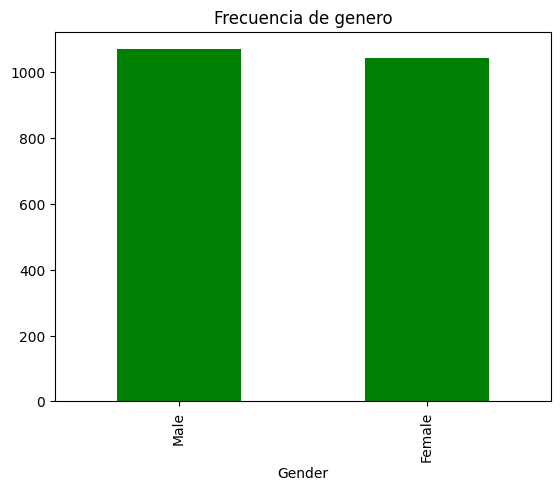

In [20]:
df["Gender"].value_counts().plot.bar(x="genero",
                                     y="frecuencia",
                                     title="Frecuencia de genero",
                                     color="green")

## AGE

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una asimetría positiva

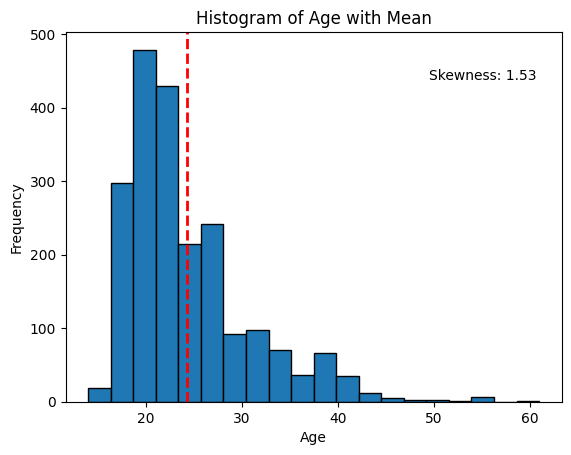

In [21]:
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Mean')

skewness = skew(df['Age'])
plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()



## Estatura 

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una simetría en el histograma y poca Kurtosis

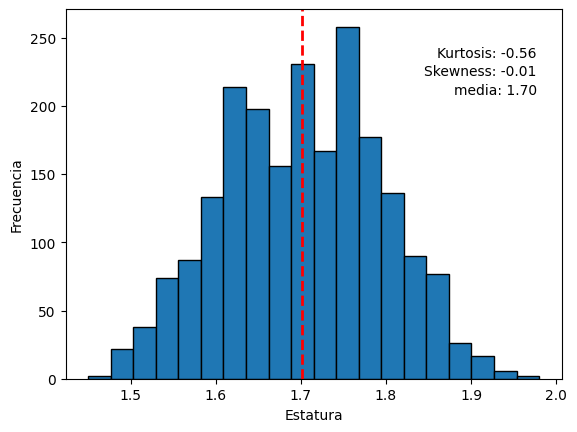

In [22]:
plt.hist(df['Height'], bins=20, edgecolor='black')
plt.axvline(df['Height'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')

kurtosis = df['Height'].kurtosis()
skewness = df['Height'].skew()
media=df['Height'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()


## PESO

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una pequeña asimetría y Kurtosis en el histograma



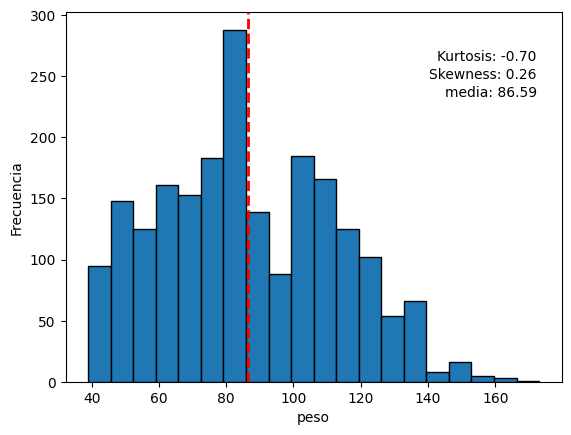

In [23]:
plt.hist(df['Weight'], bins=20, edgecolor='black')
plt.axvline(df['Weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('peso')
plt.ylabel('Frecuencia')

kurtosis = df['Weight'].kurtosis()
skewness = df['Weight'].skew()
media=df['Weight'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

# Historial de la familia con sobrepeso  

 El 81.7% de las personas tiene al menos un familiar con sobrepeso

In [24]:
df['family_history_with_overweight'].value_counts()/len(df['family_history_with_overweight'])*100

family_history_with_overweight
yes    81.762198
no     18.237802
Name: count, dtype: float64

## ¿Consume alimentos ricos en calorías con frecuencia?

El 88.3% de las personas consumen alimentos ricos en calorías con frecuencia

In [25]:
df['FAVC'].value_counts()/len(df['FAVC'])*100

FAVC
yes    88.394126
no     11.605874
Name: count, dtype: float64

## ¿Sueles comer verduras en tus comidas?

Podemos ver que a pesar de ser una variable entera, tenemos valores que no corresponden a la variable, por lo que se debe de limpiar la variable para poder trabajar con ella. para esto vamos a redondear los valores a al entero mas cercano y luego convertirlos a enteros.

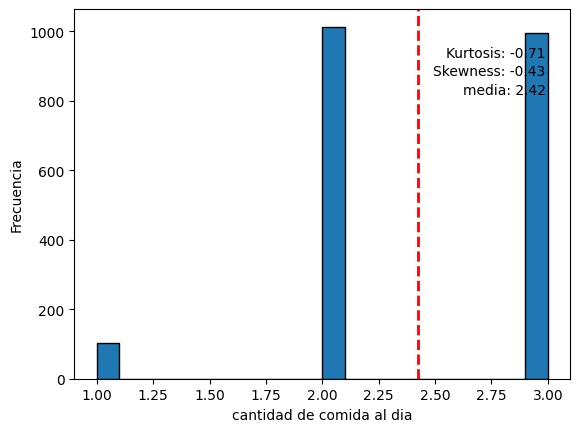

In [37]:
plt.hist(df['FCVC'], bins=20, edgecolor='black')
plt.axvline(df['FCVC'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('cantidad de comida al dia')
plt.ylabel('Frecuencia')

kurtosis = df['FCVC'].kurtosis()
skewness = df['FCVC'].skew()
media=df['FCVC'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

In [27]:

df=fn.redondear_variables(df,['FCVC'])


<Axes: xlabel='FCVC'>

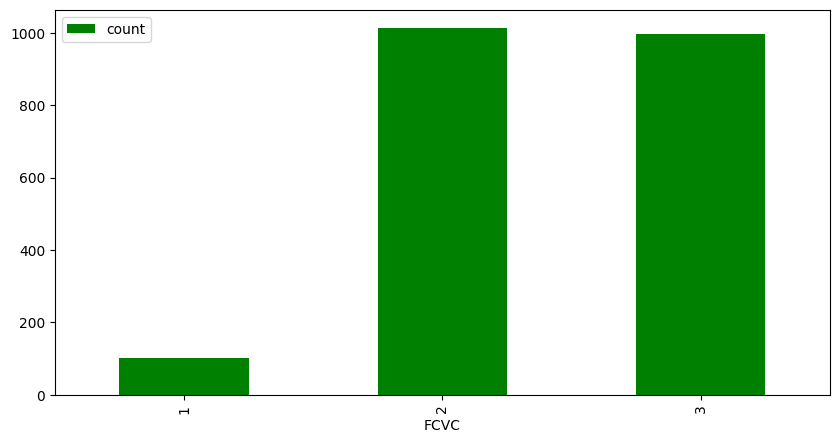

In [33]:
pd.DataFrame( df[ 'FCVC'].value_counts()).sort_values(by='FCVC').plot(kind='bar',figsize=(10,5),color='green')

## ¿Cuántas comidas principales haces al día?

Podemos ver que a pesar de ser una variable entera, tenemos valores que no corresponden a la variable, por lo que se debe de limpiar la variable para poder trabajar con ella. para esto vamos a redondear los valores a al entero mas cercano y luego convertirlos a enteros.

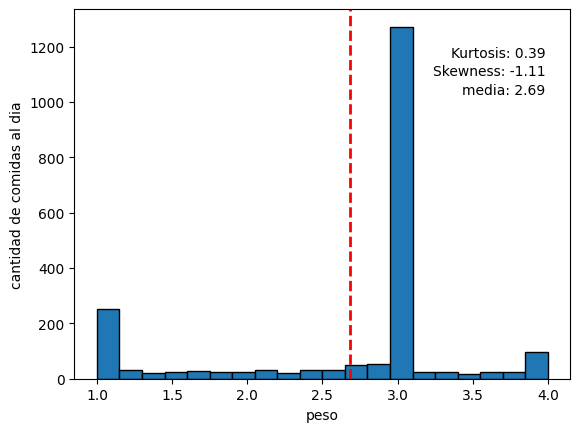

In [39]:
plt.hist(df['NCP'], bins=20, edgecolor='black')
plt.axvline(df['NCP'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('peso')
plt.ylabel('cantidad de comidas al dia')

kurtosis = df['NCP'].kurtosis()
skewness = df['NCP'].skew()
media=df['NCP'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

In [40]:
df=fn.redondear_variables(df,['NCP'])

<Axes: xlabel='NCP'>

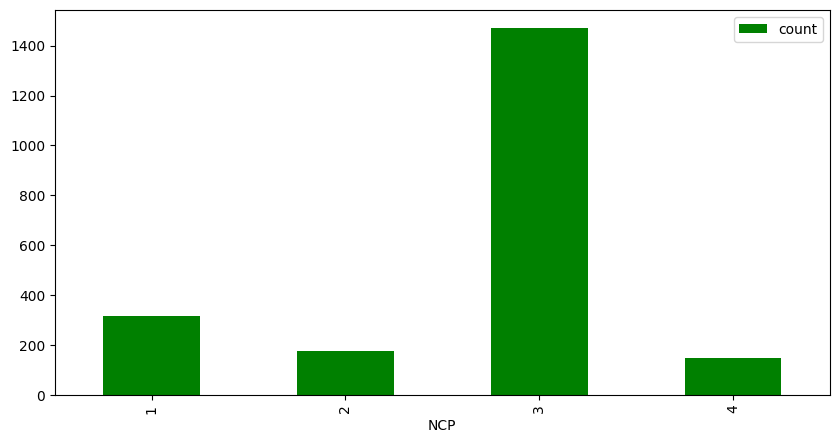

In [41]:
pd.DataFrame( df[ 'NCP'].value_counts()).sort_values(by='NCP').plot(kind='bar',figsize=(10,5),color='green')

## ¿Comes algún alimento entre comidas?

<Axes: xlabel='CAEC'>

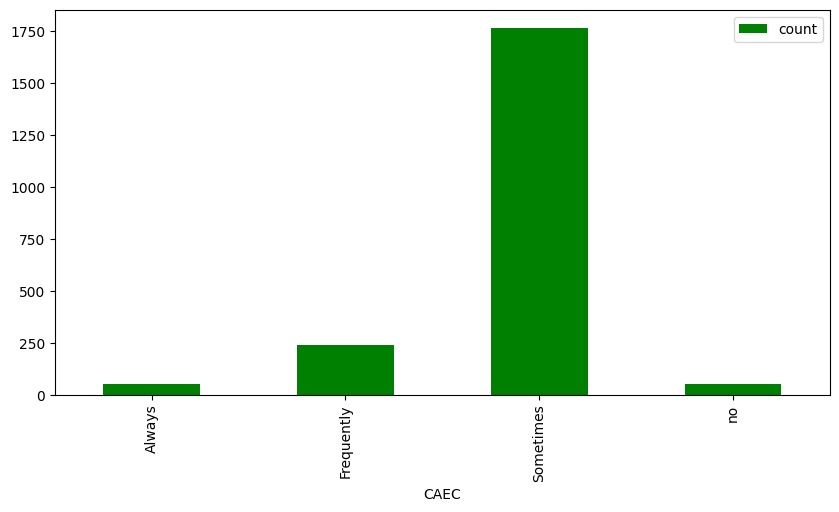

In [42]:
pd.DataFrame( df[ 'CAEC'].value_counts()).sort_values(by='CAEC').plot(kind='bar',figsize=(10,5),color='green')

## ¿Fuma usted?

<Axes: xlabel='SMOKE'>

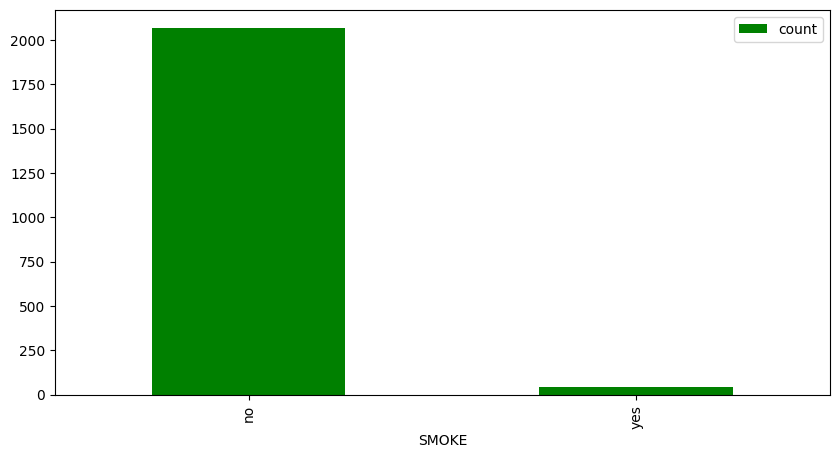

In [49]:
pd.DataFrame( df[ 'SMOKE'].value_counts()).sort_values(by='SMOKE').plot(kind='bar',figsize=(10,5),color='green')

In [ ]:
## 	¿Cuánta agua bebes diariamente?

In [35]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')